# Mnist dataset using keras Adam optimizer and evaluation

In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense


In [3]:
# read the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# 1)Split it into a training (5/7), a validation (1/7), and a test (1/7) set
# split and normalize the training, validation and test sets
X_train, y_train = X_train_full[:-10000]/255., y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:]/255., y_train_full[-10000:]
X_test = X_test/255.

In [6]:
# 2) Use Keras to built a feed-forward neural network that contains three hidden dense layers of 50 nodes
#each

# fix the random numbers generator
tf.random.set_seed(42)

# create a sequantial model of an input, three hidden and an output layer
model = Sequential()
model.add(InputLayer(input_shape=[28, 28]))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 44860 (175.23 KB)
Trainable params: 44860 (175.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 3) Compile the model using the Adam optimizer, a loss function of your choice and add accuracy in your
#metrics

# compile the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3248 - accuracy: 0.9020 - val_loss: 0.1568 - val_accuracy: 0.9533
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1443 - accuracy: 0.9573 - val_loss: 0.1586 - val_accuracy: 0.9530
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1052 - accuracy: 0.9677 - val_loss: 0.1103 - val_accuracy: 0.9677
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9735 - val_loss: 0.1208 - val_accuracy: 0.9657
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0717 - accuracy: 0.9780 - val_loss: 0.1058 - val_accuracy: 0.9707
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.1214 - val_accuracy: 0.9676
Epoch 7/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0521 - accuracy: 0.9831 - val_loss: 0.1015 - val_ac

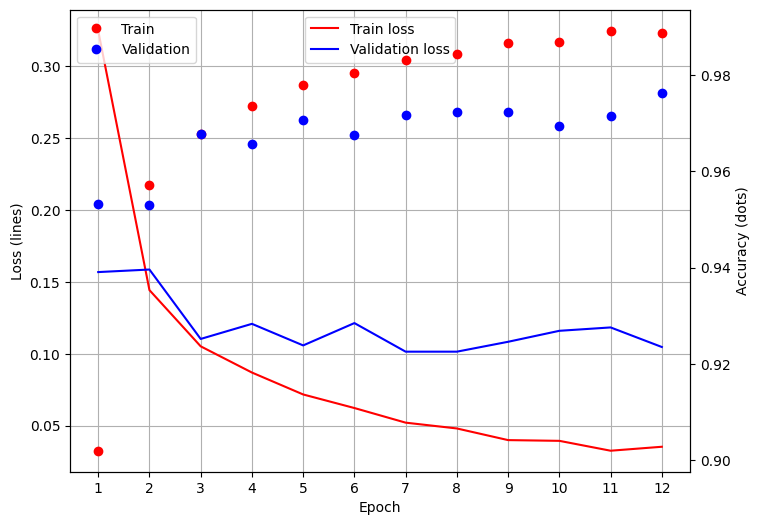

In [17]:
#6) Plot the history of the loss and accuracy of the training process for the training and the validation set
#Plot the results
x_values = range(1, len(history.history['loss'])+1)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x_values, history.history['loss'], "r-", label = "Train loss")
ax.plot(x_values, history.history['val_loss'], "b-", label = "Validation loss")
ax.set_ylabel("Loss (lines)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper center')
ax.grid()

ax1 = ax.twinx()

ax1.plot(x_values, history.history['accuracy'], "ro", label = "Train")
ax1.plot(x_values, history.history['val_accuracy'], "bo", label = "Validation")
ax1.set_ylabel("Accuracy (dots)")

plt.xticks(x_values)
plt.legend()
plt.show()

In [18]:
#7) What is the accuracy of your model on the test set?
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nThe accuracy on the test set is: {100*test_accuracy:.1f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9706

The accuracy on the test set is: 97.1%
